#  1. Project Overview 

 ### Political Donations made by Owners from American Professional Sport Teams
 
 ##### Objectives: analyze and show different party donations made from each League in the dataset 

In [1]:
import pandas as pd
import matplotlib
from pandas import DataFrame
import numpy as np

# 2. Data Collection and Loading 

In [2]:
df_donate = pd.read_csv("sports-political-donations.csv")

df_donate

,Owner,Team,League,Recipient,Amount,Election Year,Party
0,Adam Silver,Commissioner,NBA,WRIGHT 2016,"$4,000",2016,Democrat
1,Adam Silver,Commissioner,NBA,BIDEN FOR PRESIDENT,"$2,800",2020,Democrat
2,Adam Silver,Commissioner,NBA,CORY 2020,"$2,700",2020,Democrat
3,Adam Silver,Commissioner,NBA,Kamala Harris for the People,"$2,700",2020,Democrat
4,Adam Silver,Commissioner,NBA,Win The Era PAC,"$2,700",2020,Democrat
...,...,...,...,...,...,...,...
2793,Zygi Wilf,Minnesota Vikings,NFL,ANGIE CRAIG FOR CONGRESS,"$2,700",2018,Democrat
2794,Zygi Wilf,Minnesota Vikings,NFL,DEAN PHILLIPS FOR CONGRESS,"$2,700",2018,Democrat
2795,Zygi Wilf,Minnesota Vikings,NFL,MENENDEZ FOR SENATE,"$2,700",2018,Democrat
2796,Zygi Wilf,Minnesota Vikings,NFL,TINA SMITH FOR MINNESOTA,"$2,700",2018,Democrat


In [3]:
print(df_donate.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Owner          2798 non-null   object
 1   Team           2798 non-null   object
 2   League         2798 non-null   object
 3   Recipient      2798 non-null   object
 4   Amount         2798 non-null   object
 5   Election Year  2798 non-null   int64 
 6   Party          2789 non-null   object
dtypes: int64(1), object(6)
memory usage: 153.1+ KB
None


In [4]:
df_shape = df_donate.shape
print(f'The dataframe has {df_shape[0]} rows and {df_shape[1]} columns!\n')
print(df_donate.info())

The dataframe has 2798 rows and 7 columns!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Owner          2798 non-null   object
 1   Team           2798 non-null   object
 2   League         2798 non-null   object
 3   Recipient      2798 non-null   object
 4   Amount         2798 non-null   object
 5   Election Year  2798 non-null   int64 
 6   Party          2789 non-null   object
dtypes: int64(1), object(6)
memory usage: 153.1+ KB
None


In [5]:
df_donate.head()

,Owner,Team,League,Recipient,Amount,Election Year,Party
0,Adam Silver,Commissioner,NBA,WRIGHT 2016,"$4,000",2016,Democrat
1,Adam Silver,Commissioner,NBA,BIDEN FOR PRESIDENT,"$2,800",2020,Democrat
2,Adam Silver,Commissioner,NBA,CORY 2020,"$2,700",2020,Democrat
3,Adam Silver,Commissioner,NBA,Kamala Harris for the People,"$2,700",2020,Democrat
4,Adam Silver,Commissioner,NBA,Win The Era PAC,"$2,700",2020,Democrat


In [6]:
df_donate.tail()

,Owner,Team,League,Recipient,Amount,Election Year,Party
2793,Zygi Wilf,Minnesota Vikings,NFL,ANGIE CRAIG FOR CONGRESS,"$2,700",2018,Democrat
2794,Zygi Wilf,Minnesota Vikings,NFL,DEAN PHILLIPS FOR CONGRESS,"$2,700",2018,Democrat
2795,Zygi Wilf,Minnesota Vikings,NFL,MENENDEZ FOR SENATE,"$2,700",2018,Democrat
2796,Zygi Wilf,Minnesota Vikings,NFL,TINA SMITH FOR MINNESOTA,"$2,700",2018,Democrat
2797,Zygi Wilf,Minnesota Vikings,NFL,TOM MALINOWSKI FOR CONGRESS,"$2,700",2018,Democrat


# 3. Data Cleaning and Preparation

In [7]:
#im going to get rid of the unwanted columns: "Team" and "Recipient" to focus only on the party and league 

df_donate_cols = df_donate.drop(['Recipient', 'Team', 'Election Year'], axis=1)

#checking 

df_donate_cols.head()

#changing the name of the variable
donation_df = df_donate_cols

df_shape = donation_df.shape

print(f"Now that I have deleted some columns, this dataframe has {df_shape[0]} rows and {df_shape[1]} columns!")

#double checking
donation_df.head()


Now that I have deleted some columns, this dataframe has 2798 rows and 4 columns!


,Owner,League,Amount,Party
0,Adam Silver,NBA,"$4,000",Democrat
1,Adam Silver,NBA,"$2,800",Democrat
2,Adam Silver,NBA,"$2,700",Democrat
3,Adam Silver,NBA,"$2,700",Democrat
4,Adam Silver,NBA,"$2,700",Democrat


In [8]:
#checking for null values
print(donation_df.isnull().any().any())

True


In [9]:
#seeing where the null values are located
donation_df.isnull().sum()

Owner     0
League    0
Amount    0
Party     9
dtype: int64

In [10]:
#getting rid of the null values in the Party column and creating a new variable 

df_dropna = donation_df.dropna()

#placing the cleaned variable inside the original df_donate variable

donation_df = df_dropna

#checking to see if it looks good

donation_df.isnull().sum()

Owner     0
League    0
Amount    0
Party     0
dtype: int64

In [11]:
donation_df.columns

Index(['Owner', 'League', 'Amount', 'Party'], dtype='object')

In [12]:
#checking the different variables of the Owner column using value_counts() method

owner_null= donation_df['Owner'].isna().any()
print(owner_null)

donation_df["Owner"].value_counts()

False


Owner
Charles Johnson                     213
Micky Arison                        178
John Rogers                         149
Dan DeVos                           116
Jody Allen (Paul G. Allen Trust)    108
                                   ... 
Richard Petty                         1
Stephen J. Bisciotti                  1
Tom Ricketts                          1
Troy Stafford                         1
Wyc Grousbeck                         1
Name: count, Length: 158, dtype: int64

In [13]:
#checking the different variables of the Amount column using value_counts() method
amount_null= donation_df['Amount'].isna().any()
print(amount_null)

donation_df["Amount"].value_counts()

False


Amount
$2,700      436
$5,400      384
$5,000      263
$1,000      245
$5,600      226
           ... 
$53,031       1
$5,100        1
$1,100        1
$21,250       1
$18,000       1
Name: count, Length: 244, dtype: int64

In [14]:
#checking the Party columns values
donation_df.Party.value_counts()



Party
Republican                           1625
Democrat                              921
Bipartisan                            195
Bipartisan, but mostly Republican      40
Bipartisan, but mostly Democratic       5
Independent                             3
Name: count, dtype: int64

### 3a. Removing Columns from df

In [15]:
#I want to focus only on the top3: Rep, Dem, Bipart so I will remove the other values
val_to_remove = ["Bipartisan, but mostly Republican", "Bipartisan, but mostly Democratic", "Independent"]

ind_remove = donation_df[donation_df["Party"].isin(val_to_remove)].index

donation_df_filtered = donation_df.drop(ind_remove)

#checking the Party column for changes
print("The original DataFrame variables for the 'Party' column are:")
print(donation_df.Party.value_counts())

print("\n\nThe new DataFrame variables for the 'Party' column are:")
print(donation_df_filtered.Party.value_counts())

The original DataFrame variables for the 'Party' column are:
Party
Republican                           1625
Democrat                              921
Bipartisan                            195
Bipartisan, but mostly Republican      40
Bipartisan, but mostly Democratic       5
Independent                             3
Name: count, dtype: int64


The new DataFrame variables for the 'Party' column are:
Party
Republican    1625
Democrat       921
Bipartisan     195
Name: count, dtype: int64


In [16]:
#donation_df_filtered name switch back to donation_df

donation_df = donation_df_filtered

#### 3b. Cleaning the **'Amount'** column
##### *I noticed that the values have '$' and ',' so I need to take those out.*

In [17]:
#stripping the $ and , symbol from Amount column and converting values to int 

#df_donate.loc needs to be used to avoid the "settingwithcopy" error

donation_df.loc[:,'Amount'] = (donation_df['Amount'].str.replace('$', '')
                             .str.replace(',', '')
                             .astype(int))




In [18]:
#checking Amount column for changes 
donation_df.Amount

donation_df.head()

,Owner,League,Amount,Party
0,Adam Silver,NBA,4000,Democrat
1,Adam Silver,NBA,2800,Democrat
2,Adam Silver,NBA,2700,Democrat
3,Adam Silver,NBA,2700,Democrat
4,Adam Silver,NBA,2700,Democrat


In [19]:
print(donation_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2741 entries, 0 to 2797
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Owner   2741 non-null   object
 1   League  2741 non-null   object
 2   Amount  2741 non-null   object
 3   Party   2741 non-null   object
dtypes: object(4)
memory usage: 107.1+ KB
None


In [20]:
#looking at the different variables within the League column

nba_mlb = ["NBA, MLB"]

# Create a boolean mask using isin()
mask = donation_df['League'].isin(nba_mlb)

# Filter the DataFrame
result = donation_df[mask]

result.head()

,Owner,League,Amount,Party
1083,Jerry Reinsdorf,"NBA, MLB",200000,Democrat
1085,Jerry Reinsdorf,"NBA, MLB",200000,Republican
1086,Jerry Reinsdorf,"NBA, MLB",100000,Democrat
1087,Jerry Reinsdorf,"NBA, MLB",100000,Republican
1088,Jerry Reinsdorf,"NBA, MLB",84000,Republican


In [21]:
#find the owners who have donated the most amounts for all parties

#group the owners by amount and sum the total amount 
owner_amount = donation_df.groupby('Owner')['Amount'].sum()

#find the owner with the most amount least amount donated
most_amount_owner = owner_amount.idxmax()
most_amount = owner_amount.max()
min_amount_owner = owner_amount.idxmin()
min_amount = owner_amount.min()

#print the result
print(f'The Owner with the most amount donated is "{most_amount_owner}" with ${most_amount} donated.')
print(f'\nThe Owner with the least amount donated is "{min_amount_owner}" with ${min_amount} donated.')

The Owner with the most amount donated is "Charles Johnson" with $11000700 donated.

The Owner with the least amount donated is "Jerry Bruckheimer" with $250 donated.


In [22]:
#create function to find the owner with the most/least donation amount in complete dataframe

def max_donate(donation_df):
    owner_donate = donation_df.groupby('Owner')['Amount'].sum()
    result = owner_donate.idxmax()
    return result

print(max_donate(donation_df))

def min_donate(donation_df):
    owner_donate = donation_df.groupby('Owner')['Amount'].sum()
    result = owner_donate.idxmin()
    return result

print(min_donate(donation_df))

Charles Johnson
Jerry Bruckheimer


## 4. Creating seperate DataFrames for each Party

### 4a. Democratic Party

In [23]:
#checking Party variables
print(donation_df.Party.unique())


#creating a seperate dataframe for the democratic donations

df_dem = donation_df[donation_df["Party"] == "Democrat"]

df_dem["League"].value_counts()


['Democrat' 'Bipartisan' 'Republican']


League
WNBA              210
NBA               171
MLB               162
NFL                92
NHL                87
NBA, NFL           47
NBA, WNBA          47
NBA, NHL           38
NBA, MLB           29
NASCAR             19
NBA, NHL, WNBA     15
MLB, WNBA           3
NBA, NFL, NHL       1
Name: count, dtype: int64

In [24]:
#testing the max/min owner donatin function on the new dataframes

#max donation function
def dem_max_donate(df_dem):
    owner_donate = df_dem.groupby('Owner')['Amount'].sum()
    result = owner_donate.idxmax()
    return result

print(dem_max_donate(df_dem))

#min donation function
def dem_min_donate(df_dem):
    owner_donate = df_dem.groupby('Owner')['Amount'].sum()
    result = owner_donate.idxmin()
    return result

print(dem_min_donate(df_dem))

Peter Angelos
Dean A. Spanos


In [25]:
df_dem.League.unique()

array(['NBA', 'MLB', 'NHL', 'NASCAR', 'NFL', 'WNBA', 'NBA, NHL',
       'NBA, NFL, NHL', 'NBA, WNBA', 'NBA, MLB', 'NBA, NFL', 'MLB, WNBA',
       'NBA, NHL, WNBA'], dtype=object)

In [26]:
#find the top donors for the Dem party
dem_owners = df_dem.groupby('Owner')['Amount'].sum()

dem_owners = dem_owners.sort_values(ascending=False)
dem_owners.head(5)

print(dem_owners.head())

Owner
Peter Angelos      2082772
Laura Ricketts     1715424
John Rogers         661650
Ron Burkle          639300
Jerry Reinsdorf     410100
Name: Amount, dtype: object


In [27]:
print(dem_owners.tail(5))

Owner
Andrew Murstein    1000
Jeff Dickerson      650
Harvey Alter        500
Wyc Grousbeck       500
Dean A. Spanos      250
Name: Amount, dtype: object


In [28]:
#sort_value method is combining two seperate rows into one row. I am going to try to seperate

df_dem['index'] = np.arange(len(df_dem))
    
# Sort by 'col1' and then by 'index'
df_sorted = df_dem.sort_values(by=['Owner', 'index'])
    
# Reset index
df_sorted = df_sorted.drop(columns=['index']).reset_index(drop=True)

df_sorted.Amount.max()


C:\Users\pwurt\AppData\Local\Temp\ipykernel_31356\651244572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dem['index'] = np.arange(len(df_dem))


750000

In [29]:
df_dem = df_sorted

# Group by Owner League and Party then sum the specified columns
top_five_dem = df_dem.groupby(['Owner','League', 'Party']).sum().reset_index()

# Sort the entire DataFrame by 'Amount' in descending order
top_five_dem = top_five_dem.sort_values(by='Amount', kind='sort', ascending=False)

top_five_dem.head(5)

df_dem = top_five_dem

df_dem.head()

,Owner,League,Party,Amount
70,Peter Angelos,MLB,Democrat,2082772
58,Laura Ricketts,MLB,Democrat,1715424
53,John Rogers,WNBA,Democrat,661650
80,Ron Burkle,NHL,Democrat,639300
45,Jerry Reinsdorf,"NBA, MLB",Democrat,410100


### Sum, Mean, Median

In [30]:
dem_amount_sum = df_dem['Amount'].sum()
dem_amount_mean = df_dem['Amount'].mean().round(2)
dem_amount_median = df_dem['Amount'].median()

print(f'The total Amount donated (USD) for the Democratic Party is ${dem_amount_sum}.\nThe mean amount is ${dem_amount_mean}.\nThe median amount is ${dem_amount_median}.')

The total Amount donated (USD) for the Democratic Party is $10113639.
The mean amount is $101136.39.
The median amount is $17837.5.


In [31]:
#create function to sort the top donors to the Democratic party
def top_dems(df_dem):
    # Group by Category and State and sum the specified columns
    top_ten_dem = df_sorted.groupby(['Owner','League', 'Party']).sum().reset_index()
    # Sort the entire DataFrame by 'Usd Pledged Real' in descending order
    top_ten_dem = top_ten_dem.sort_values(by='Amount', kind='sort', ascending=False)
    return top_ten_dem

top_dems(df_dem).head()
    

,Owner,League,Party,Amount
70,Peter Angelos,MLB,Democrat,2082772
58,Laura Ricketts,MLB,Democrat,1715424
53,John Rogers,WNBA,Democrat,661650
80,Ron Burkle,NHL,Democrat,639300
45,Jerry Reinsdorf,"NBA, MLB",Democrat,410100


## **Create Bar graph for the democratic donors**

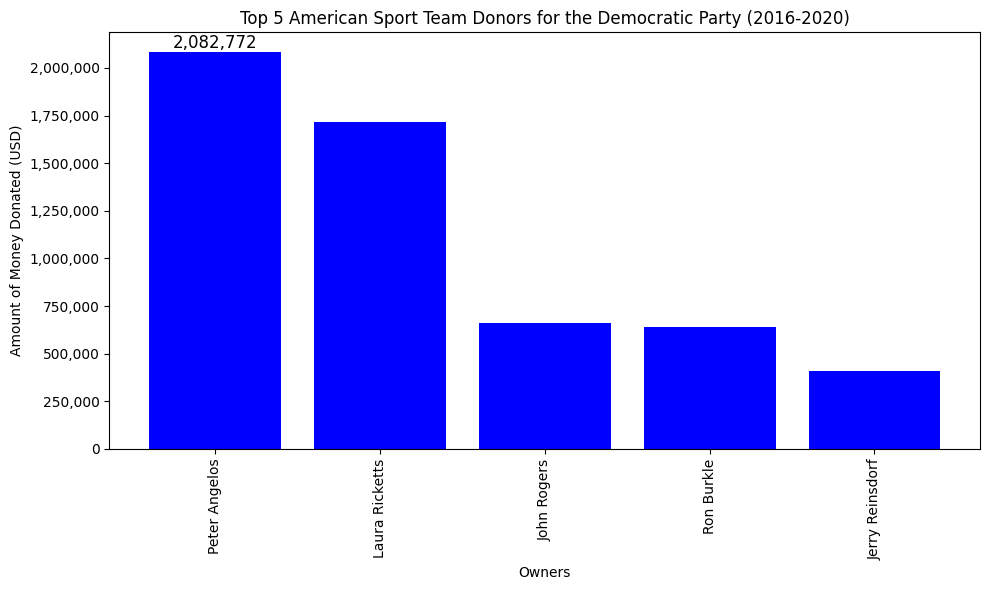

In [32]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#change type of Amount column
df_dem['Amount'] = pd.to_numeric(df_dem['Amount'], errors='coerce')

# Step 1: Extract Data
# Replace these with your actual DataFrame columns
top_5_owners = df_dem.groupby('Owner')['Amount'].sum().nlargest(5)

# Step 2: Create the Plot
plt.figure(figsize=(10, 6))
plt.bar(top_5_owners.index, top_5_owners.values, color='blue')

#add text to amount donated by the highest donor
plt.text(0, top_5_owners.values[0], f'{top_5_owners.values[0]:,.0f}', 
         ha='center', va='bottom', fontsize=12, color='black')



# Step 3: Rotate x-axis labels
plt.xticks(rotation=90)

# Step 4: Add Title and Labels
plt.title('Top 5 American Sport Team Donors for the Democratic Party (2016-2020)')  # Title of the plot
plt.xlabel('Owners')  # Label for x-axis
plt.ylabel('Amount of Money Donated (USD)')  # Label for y-axis

# Step 5: Optional - Add Gridlines
# Uncomment the following line if you want to add gridlines
# plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Step 6: Adjust Layout
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()  # Adjust layout to avoid overlap

# Step 7: Show the Plot
plt.show()


### 4b. Republican Party

In [33]:
#creating a seperate df for the republican donations 

df_rep = donation_df[donation_df["Party"] == "Republican"]

df_rep.head(20)
print(df_rep.tail(10))


                       Owner  League Amount       Party
2757            Tony Ressler     NBA   2000  Republican
2758           Troy Stafford  NASCAR    250  Republican
2767  W. Joseph Williams Jr.     MLB   5400  Republican
2768  W. Joseph Williams Jr.     MLB   5100  Republican
2769  W. Joseph Williams Jr.     MLB   5000  Republican
2770  W. Joseph Williams Jr.     MLB   2500  Republican
2771  W. Joseph Williams Jr.     MLB   2000  Republican
2772  W. Joseph Williams Jr.     MLB   1500  Republican
2774  W. Joseph Williams Jr.     MLB   1000  Republican
2776  W. Joseph Williams Jr.     MLB    400  Republican


In [34]:
#find the top donors for the Rep party
rep_owners = df_rep.groupby('Owner')['Amount'].sum()

rep_owners = rep_owners.sort_values(ascending=False)
rep_owners.head(5)

print(rep_owners.head())

Owner
Charles Johnson           10995500
Dan DeVos                  2280400
Philip F. Anschutz         1776700
Jimmy and Susan Haslam     1596900
Dan Gilbert                1479700
Name: Amount, dtype: object


In [35]:
# Group by Owner League and Party then sum the specified columns
top_five_rep = df_rep.groupby(['Owner','League', 'Party']).sum().reset_index()

# Sort the entire DataFrame by 'Amount' in descending order
top_five_rep = top_five_rep.sort_values(by='Amount', kind='sort', ascending=False)

top_five_rep.head(5)

df_rep = top_five_rep

df_rep.head()

,Owner,League,Party,Amount
11,Charles Johnson,MLB,Republican,10995500
20,Dan DeVos,NBA,Republican,2280400
74,Philip F. Anschutz,NHL,Republican,1776700
49,Jimmy and Susan Haslam,NFL,Republican,1596900
21,Dan Gilbert,NBA,Republican,1479700


In [36]:
df_rep.tail()

,Owner,League,Party,Amount
1,Andrew Murstein,NASCAR,Republican,1000
54,John Mara,NFL,Republican,1000
78,Richard Petty,NASCAR,Republican,1000
46,Jerry Bruckheimer,NHL,Republican,250
102,Troy Stafford,NASCAR,Republican,250


## Sum, Mean, Median

In [37]:
rep_amount_sum = df_rep['Amount'].sum()
rep_amount_mean = df_rep['Amount'].mean().round(2)
rep_amount_median = df_rep['Amount'].median()

print(f'The total Amount donated (USD) for the Republican Party is ${rep_amount_sum}.\nThe mean amount is ${rep_amount_mean}.\nThe median amount is ${rep_amount_median}.')

The total Amount donated (USD) for the Republican Party is $34246016.
The mean amount is $329288.62.
The median amount is $41429.0.


In [38]:
#change type of Amount column
df_rep['Amount'] = pd.to_numeric(df_rep['Amount'], errors='coerce')

## **Create a bar graph for the Republican Party**

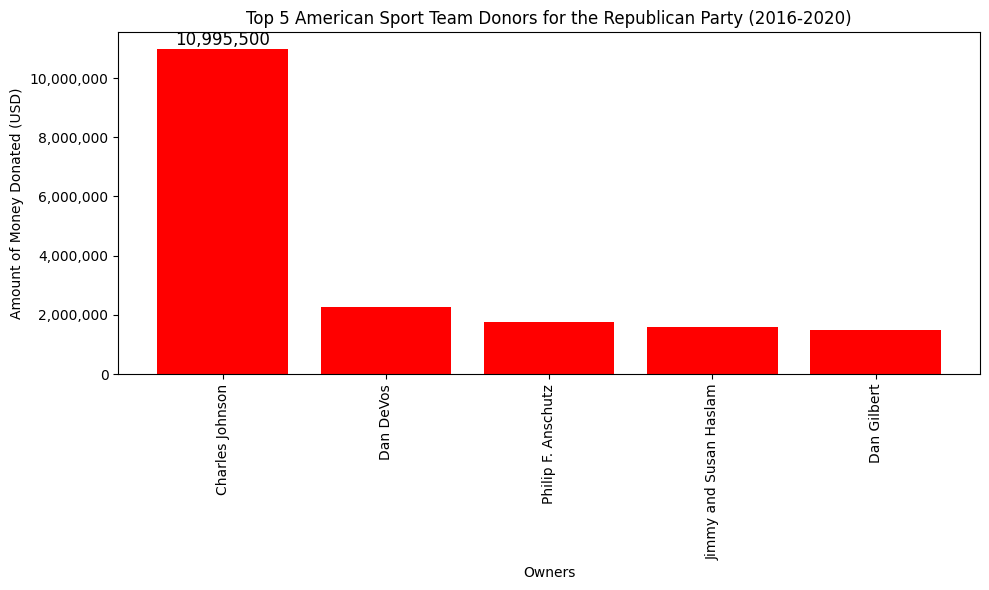

In [39]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df_rep['Amount'] = pd.to_numeric(df_rep['Amount'], errors='coerce')

# Step 1: Extract Data
# Replace these with your actual DataFrame columns
top_5_owners_rep = df_rep.groupby('Owner')['Amount'].sum().nlargest(5)

# Step 2: Create the Plot
plt.figure(figsize=(10, 6))
plt.bar(top_5_owners_rep.index, top_5_owners_rep.values, color='red')

#add text to amount donated by the highest donor
plt.text(0, top_5_owners_rep.values[0], f'{top_5_owners_rep.values[0]:,.0f}', 
         ha='center', va='bottom', fontsize=12, color='black')



# Step 3: Rotate x-axis labels
plt.xticks(rotation=90)

# Step 4: Add Title and Labels
plt.title('Top 5 American Sport Team Donors for the Republican Party (2016-2020)')  # Title of the plot
plt.xlabel('Owners')  # Label for x-axis
plt.ylabel('Amount of Money Donated (USD)')  # Label for y-axis

# Step 5: Optional - Add Gridlines
# Uncomment the following line if you want to add gridlines
# plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Step 6: Adjust Layout
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()  # Adjust layout to avoid overlap

# Step 7: Show the Plot
plt.show()


### 4c. Bipartisan Party

In [40]:
#creating a variable for all of the bipartisan donations
df_bipart = donation_df[donation_df["Party"] == "Bipartisan"]

print(df_bipart.info())

df_bipart.head()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 17 to 2790
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Owner   195 non-null    object
 1   League  195 non-null    object
 2   Amount  195 non-null    object
 3   Party   195 non-null    object
dtypes: object(4)
memory usage: 7.6+ KB
None


,Owner,League,Amount,Party
17,Amy Adams Strunk,NFL,10000,Bipartisan
18,Amy Adams Strunk,NFL,10000,Bipartisan
19,Amy Adams Strunk,NFL,5000,Bipartisan
25,Arte Moreno,MLB,10000,Bipartisan
26,Arte Moreno,MLB,10000,Bipartisan


In [41]:
#find the top donors for the Rep party
bipart_owners = df_bipart.groupby('Owner')['Amount'].sum()

bipart_owners = bipart_owners.sort_values(ascending=False)

bipart_owners.head()


Owner
Jimmy and Susan Haslam                   95000
Jeremy M. Jacobs and Jerry Jacobs Jr.    65000
Arthur J. Rooney II                      56000
Rocky Wirtz                              50000
Richard Childress                        35000
Name: Amount, dtype: object

In [42]:
# Group by Owner League and Party then sum the specified columns
top_five_bipart = df_bipart.groupby(['Owner','League', 'Party']).sum().reset_index()

# Sort the entire DataFrame by 'Amount' in descending order
top_five_bipart = top_five_bipart.sort_values(by='Amount', kind='sort', ascending=False)

top_five_bipart.head(5)

df_bipart = top_five_bipart

df_bipart

,Owner,League,Party,Amount
36,Jimmy and Susan Haslam,NFL,Bipartisan,95000
31,Jeremy M. Jacobs and Jerry Jacobs Jr.,NHL,Bipartisan,65000
3,Arthur J. Rooney II,NFL,Bipartisan,56000
61,Rocky Wirtz,NHL,Bipartisan,50000
49,Mark H. Murphy (Executive Committee),NFL,Bipartisan,35000
...,...,...,...,...
70,Terry Pegula,"NHL, NFL",Bipartisan,5000
9,Cathy Engelbert,WNBA,Bipartisan,3750
22,Gail Miller,NBA,Bipartisan,2000
25,Henry and Susan Samueli,NHL,Bipartisan,2000


In [45]:
bipart_amount_sum = df_bipart['Amount'].sum()
bipart_amount_mean = df_bipart['Amount'].mean().round(2)
bipart_amount_median = df_bipart['Amount'].median()

print(f'The total Amount donated (USD) for the Bipartisan Party is ${bipart_amount_sum}.\nThe mean amount is ${bipart_amount_mean}.\nThe median amount is ${bipart_amount_median}.')

The total Amount donated (USD) for the Bipartisan Party is $1474699.
The mean amount is $19403.93.
The median amount is $16666.5.


## **Create a bar graph for the Bipartisan Party**

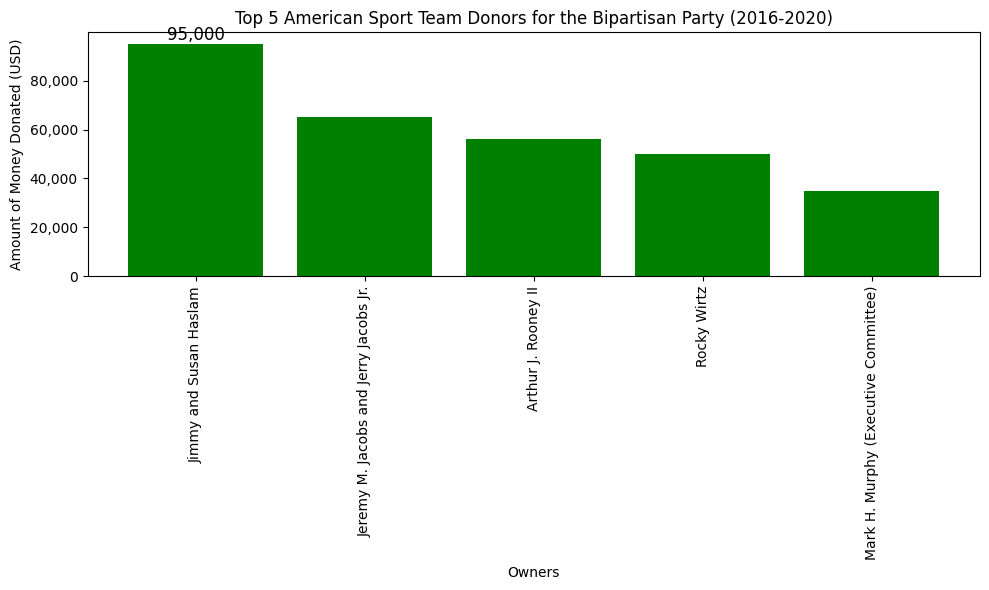

In [44]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#change type of Amount column
df_bipart['Amount'] = pd.to_numeric(df_bipart['Amount'], errors='coerce')


# Step 1: Extract Data
# Replace these with your actual DataFrame columns
top_5_owners_bipart = df_bipart.groupby('Owner')['Amount'].sum().nlargest(5)

# Step 2: Create the Plot
plt.figure(figsize=(10, 6))
plt.bar(top_5_owners_bipart.index, top_5_owners_bipart.values, color='green')

#add text to amount donated by the highest donor
plt.text(0, top_5_owners_bipart.values[0], f'{top_5_owners_bipart.values[0]:,.0f}', 
         ha='center', va='bottom', fontsize=12, color='black')



# Step 3: Rotate x-axis labels
plt.xticks(rotation=90)

# Step 4: Add Title and Labels
plt.title('Top 5 American Sport Team Donors for the Bipartisan Party (2016-2020)')  # Title of the plot
plt.xlabel('Owners')  # Label for x-axis
plt.ylabel('Amount of Money Donated (USD)')  # Label for y-axis

# Step 5: Optional - Add Gridlines
# Uncomment the following line if you want to add gridlines
# plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Step 6: Adjust Layout
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()  # Adjust layout to avoid overlap

# Step 7: Show the Plot
plt.show()


# 5. Analysis and Conclusion

##### From the above analysis, the data shows that the Party with the most money donated from 2016-2020 by the owners of American professional sport teams is the Republican Party with $34,246,016 donated! The Democratic Party received $10,113,639 and the Bipartisan Party received only $1,474,699. This data shows that the both the Republican and Democratic Parties receive significant donations from Professional Sport Team owners in America and the Bipartisan does not have much support. Also, something I found interesting was the top donor for the Republican Party, "Charles Johnson" because of how much more he donated in comparison to the other Republican Party supporters. He was a big outlier in the Republican Party dataset and being able to see it displayed in the bar graph really highlighted that. In conclusion, this project was really fun and challenging! Although I wish I would have chosen a dataset that I found a little more interesting, it was really fun trying to figure things out and find answers to each step along the way. I am looking forward to the next project.